# 1 Data wrangling<a id='1_Data_wrangling'></a>

## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data wrangling](#1_Data_wrangling)
    * [1.1 Contents](#1.1_Contents)
    * [1.2 Introduction](#1.2_Introduction)
        * [1.2.1 Problem Identification](#1.2.1_Problem_Identification)
    * [1.3 Imports](#1.3_Imports)
    * [1.4 Load the Raw Data](#1.4_Load_the_raw_data)
    * [1.5 Explore the Raw Data](#1.5_Explore_the_raw_data)
        * [1.5.1 Categorical Features](#1.5.1_Categorical_Features)
            * [1.5.1.1 Categorical Features with Target](#1.5.1.1_Categorical_Features_with_target)
        * [1.5.2 Ordinal Features](#1.5.2_Ordinal_Features)
        * [1.5.3 Continuous Features](#1.5.3_Continuous_Features)
    * [1.6 Export the Cleaned Data](#1.6_Export_the_cleaned_data)
            

## 1.2 Introduction<a id='1.2_Introduction'></a>

A survey was conducted in 2015 among a hundred thousand respondents to track their level of satisfaction based on their inflight experience for a major airline carrier. For a long time, there has been a huge competition in the airline space to offer the best services at the lowest costs possible.

This dataset can be found at the link here:
https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction 

### 1.2.1 Problem Identification<a id='1.2.1_Problem_Identification'></a>

Given that airlines need to balance budgets and cut costs to compete in this industry, the carrier conducting this study wants to identify the key variables that impact customer satisfaction and thereby optimize their marketing campaign to efficiently target consumer segments based on demographics, inflight experience, boarding experience and travel delays.

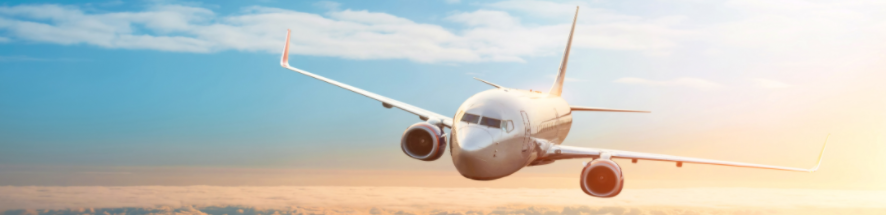



## 1.3 Imports<a id='1.3_Imports'></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1.4 Load the Raw data<a id='1.4_Load_the_raw_data'></a>

In [23]:
#Check working Directory
print(os.getcwd())

C:\Users\Neel Deorukhkar\Documents\SpringboardProjects\Capstone2\predict_customer_sat\notebooks


In [24]:
#Load the Raw Data
raw_data = pd.read_csv('../data/raw/train.csv', index_col = 'id', na_values= '')

## 1.5 Explore the Raw data<a id='1.5_Explore_the_raw_data'></a>

In [25]:
#Preview the data
pd.set_option('display.max_columns', None)
with pd.option_context('display.max_rows',10):
    display(raw_data)

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,,
70172,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
24026,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
73097,103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
68825,103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied


In [26]:
#Check the Raw data Structure
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 70172 to 62567
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1

The Dataset consists of survey questions related to a respondent's inflight experience, demographics, type of travel and Satisfaction.

Shape - There are 103904 respondents who participated in the survey and there are 25 columns
Only `Arrival in Delay in Minutes` has `310` missing values. The rest of data is not missing

There is one float, 18 integer and 5 Categorical features.

Note that variables from `Inflight wifi service` to `Cleanliness` are survey questions on a 5 point scale

The first column is unnamed but seems to be an Auto incrementing row number. We can drop the column

In [27]:
print(raw_data.iloc[:, 0].is_unique)
print(raw_data.index.is_unique)

True
True


In [28]:
#Drop the first column since
raw_data.drop(raw_data.columns[0], axis = 1, inplace = True)

In [29]:
#Exploring the Target variable
print(raw_data.satisfaction.value_counts())

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


`satisfaction` is the target variable and has a fairly even split between the number of respondents that are satisfied or not.

### 1.5.1 Categorical Features<a id='1.5.1_Categorical_Features'></a>

In [30]:
def investigate_object(df):
    """
    This function investigates object columns in the dataset
    
    Parameters
    ----------
    df : Expects a pandas DataFrame
    
    Returns
    -------
    prints unique values
    """
    
    object_cols = df.select_dtypes('object').columns
    [print(df[col].value_counts(), '\n---------------------------------------') for col in df[object_cols]]

In [31]:
investigate_object(raw_data)

Female    52727
Male      51177
Name: Gender, dtype: int64 
---------------------------------------
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64 
---------------------------------------
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64 
---------------------------------------
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64 
---------------------------------------
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64 
---------------------------------------


There are 5 categorical variables out of which 1 is the target variable

### 1.5.1.1 Categorical Features with Target<a id='1.5.1.1_Categorical_Features_with_target'></a>

Text(0.5, 1.0, 'Class by Satisfaction')

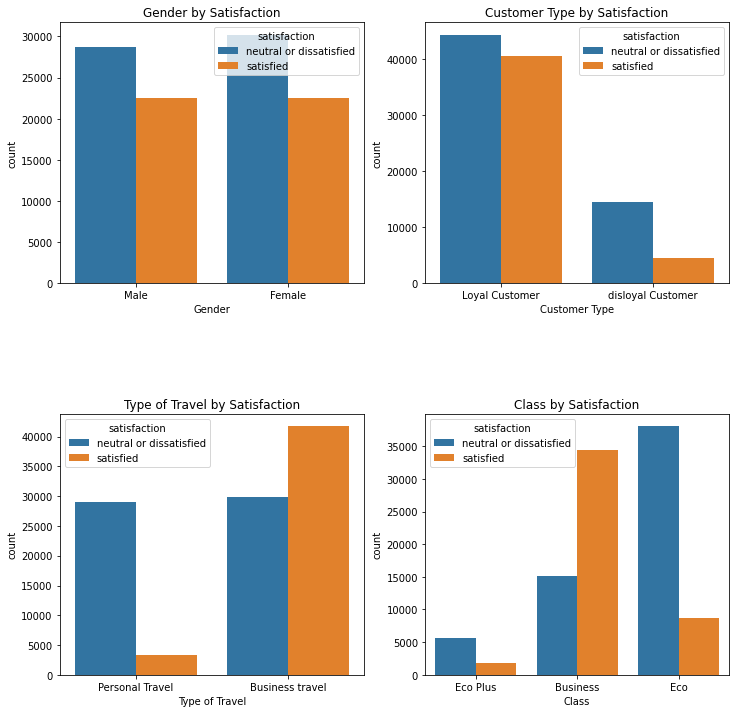

In [32]:
#Plot Categorical Variables by Satisfaction
%matplotlib inline
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5);
sns.countplot(x = 'Gender', data = raw_data, hue = 'satisfaction', ax= ax[0][0])
ax[0][0].set_title('Gender by Satisfaction')
sns.countplot(x = 'Customer Type', data = raw_data, hue = 'satisfaction', ax= ax[0][1])
ax[0][1].set_title('Customer Type by Satisfaction')
sns.countplot(x = 'Type of Travel', data = raw_data, hue = 'satisfaction', ax= ax[1][0])
ax[1][0].set_title('Type of Travel by Satisfaction')
sns.countplot(x = 'Class', data = raw_data, hue = 'satisfaction', ax= ax[1][1])
ax[1][1].set_title('Class by Satisfaction')


Some Interesting findings above:
1. It seems that `Gender` doesn't act as an Important Predictor of Satisfaction. The distribution between Men and Women is fairly similar.
2. Loyal Customers tend to be more satisfied than disloyal customers
3. Clearly, the `Type of Travel` matters significantly. People who are traveling on a business travel tend to be more satisfied than personal travel.
4. Business class travelers are more satisfied than Eco / Eco Plus travellers which makes sense. 

In [33]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1

### 1.5.2 Ordinal Features<a id='1.5.2_Ordinal_Features'></a>

In [34]:
ordinal_cols = raw_data.loc[:, 'Inflight wifi service': 'Cleanliness'].columns
print(ordinal_cols)

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')


In [35]:
raw_data[ordinal_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0
On-board service,103904.0,3.382363,1.288354,0.0,2.0,4.0,4.0,5.0
Leg room service,103904.0,3.351055,1.315605,0.0,2.0,4.0,4.0,5.0


The are 14 variables about a respondent's infligtht experience. None of the variables have any missing values.
There are no outliers in the data; Furthermore, all the questions are on a 5 point scale. We can do more exploratory data analysis later, but from a Data Wrangling perspective, all the variables are clean

### 1.5.3 Continuous Features<a id='1.5.3_Continuous_Features'></a>

In [36]:
continuous_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [37]:
raw_data[continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.178678,38.698682,0.0,0.0,0.0,13.0,1584.0


`Arrival Delay in Minutes` has 310 missing observations. Given that the median arrival delay is 0 minutes, it's safe to fill the missing values with 0.

In [38]:
#Fill Arrival Delay in Minutes with 0
raw_data['Arrival Delay in Minutes'].fillna(0, inplace = True)
print(raw_data['Arrival Delay in Minutes'].isnull().sum())

0


In [39]:
#Convert Satisfaction to numeric
raw_data['satisfaction'] = raw_data['satisfaction'].apply(lambda x: 1 if (x == 'satisfied') else 0)

In [40]:
raw_data['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [41]:
#Export the Cleaned Data
raw_data.to_csv('../data/interim/raw_data_clean.csv')

#### Summary of Data Cleaning

In [ ]:
#Need to perform similar Cleaning methods on test data
#raw_data = pd.read_csv('../data/raw/train.csv', index_col = 'id', na_values= '')
#raw_data.drop(raw_data.columns[0], axis = 1, inplace = True)
#raw_data.drop('Gender', axis = 1, inplace = True)
#raw_data['Arrival Delay in Minutes'].fillna(0, inplace = True)
#raw_data['satisfaction'] = raw_data['satisfaction'].apply(lambda x: 1 if (x == 'satisfied') else 0)